In [25]:
renaming = ['Crash Death Count', 
	'Crash Incapacitating Injury Count', 
	'Crash Non-incapacitating Injury Count', 
	'Crash Not Injured Count', 
	'Crash Possible Injury Count',
	'Crash Time',
	'Crash Year', 
	'Crash Total Injury Count', 
	'Crash Unknown Injury Count']
renaming[0].replace('Crash ', '')
renaming = {k:k.replace('Crash ', '') for k in renaming}
renaming

{'Crash Death Count': 'Death Count',
 'Crash Incapacitating Injury Count': 'Incapacitating Injury Count',
 'Crash Non-incapacitating Injury Count': 'Non-incapacitating Injury Count',
 'Crash Not Injured Count': 'Not Injured Count',
 'Crash Possible Injury Count': 'Possible Injury Count',
 'Crash Time': 'Time',
 'Crash Year': 'Year',
 'Crash Total Injury Count': 'Total Injury Count',
 'Crash Unknown Injury Count': 'Unknown Injury Count'}

In [27]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.set_index('Crash ID', inplace=True)
df.drop(['MercatorX', 'MercatorY'], axis=1, inplace=True)
df.rename(columns = renaming,inplace=True)
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Death Count,Incapacitating Injury Count,Non-incapacitating Injury Count,Not Injured Count,...,Roadway Alignment,Roadway Part,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
Crash ID,,,,,,,,,,,,,,,,,,,,,
11243623,False,False,Austin Police Department,False,False,No,0,1,0,0,...,"Straight, Hillcrest",Main/Proper Lane,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
12112069,False,False,Austin Police Department,False,False,No,0,0,2,1,...,"Straight, Level",Main/Proper Lane,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
11376123,False,False,Austin Police Department,False,False,No,0,0,1,1,...,"Straight, Level",Main/Proper Lane,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn
11318193,False,False,Austin Police Department,False,False,No,0,0,1,2,...,"Straight, Grade",Main/Proper Lane,On Roadway,35,W MARTIN LUTHER KING JR BLVD,398,Dry,Marked Lanes,Clear,"Worn, Unk Damage"
11286981,False,False,Austin Police Department,True,False,No,0,0,1,0,...,"Straight, Level",Main/Proper Lane,On Roadway,30,VICTORY DR,3801,Dry,Stop Sign,Clear,Not Worn


<AxesSubplot:xlabel='Year'>

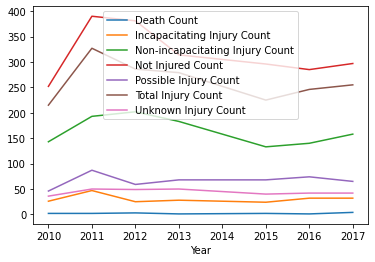

In [28]:
li = ['Death Count',
 'Incapacitating Injury Count',
 'Non-incapacitating Injury Count',
 'Not Injured Count',
 'Possible Injury Count',
 'Total Injury Count',
 'Unknown Injury Count']
temp = df.groupby("Year").sum()

temp[li].plot.line()

In [33]:
from bokeh.plotting import figure
from bokeh.palettes import Spectral10
from bokeh.tile_providers import get_provider, WIKIMEDIA
from bokeh.io import output_notebook, show, curdoc
from bokeh.models import ColumnDataSource, RangeSlider
from bokeh.layouts import column, row
output_notebook()

Loading BokehJS ...

In [35]:
fig = figure(plot_width=900, plot_height=700,
           y_range=(0, 450), x_range=(2010, 2017),
           x_axis_label = 'year', y_axis_label = 'total count',
           title="Austin Bicycle Crashes")
temp = df.groupby("Year").sum()
for i, color in zip(li, Spectral10):
    fig.line(y = temp[i], x = temp.index, legend_label = i, color=color, line_width=3)

fig.legend.location = "top_right"
fig.legend.click_policy="mute"

show(fig)